In [ ]:
# Load packages to read csv of loan approval data sets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt # For early visualizations and EDA.

### Primary Set

In [ ]:
# Read data from granjithkumar's dataset on kaggle
from google.colab import files


uploaded = files.upload()

Saving Loan_Train.csv to Loan_Train (2).csv


In [ ]:
granjithkumar_loan_aproval = pd.read_csv('Loan_Train.csv')

In [ ]:
# Display dimensions of dataset
granjithkumar_loan_aproval.shape

(614, 13)

In [ ]:
# Display first 5 lines
granjithkumar_loan_aproval.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Display data types for columns in dataframe
granjithkumar_loan_aproval.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
# Display summary statistics for categorical features
granjithkumar_loan_aproval.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
# Display summary statistics for numerical features
granjithkumar_loan_aproval.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Interestingly, the column labeled `Credit_History` is listed as float64, which means that when we calculate summary statistics, we see mean, min, max, and the IQR. However, it appears that these numbers are actually represent a binary variable. We can operate under the presumption that this value likely means 0 is no prior credit history and 1 means that the applicant did have a prior credit history.

In [ ]:
# Verify if there is any missing data
granjithkumar_loan_aproval.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Of considerable concern is that we have missing values in the `LoanAmount` and `Credit_History` columns. We will need to carefully consider how we address these missing values as this will have an impact on our analysis.

[]

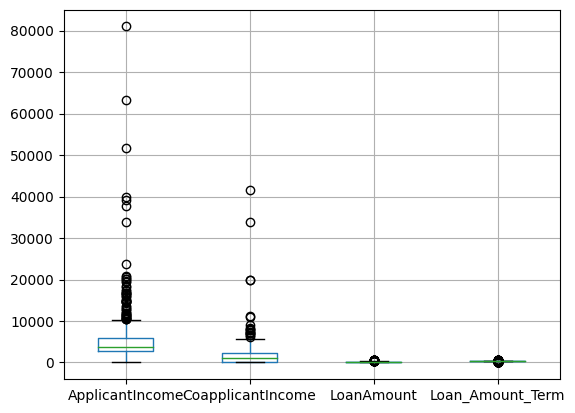

In [ ]:
# Visualize outliers
b_plot = granjithkumar_loan_aproval.boxplot(column =  \
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])
b_plot.plot()


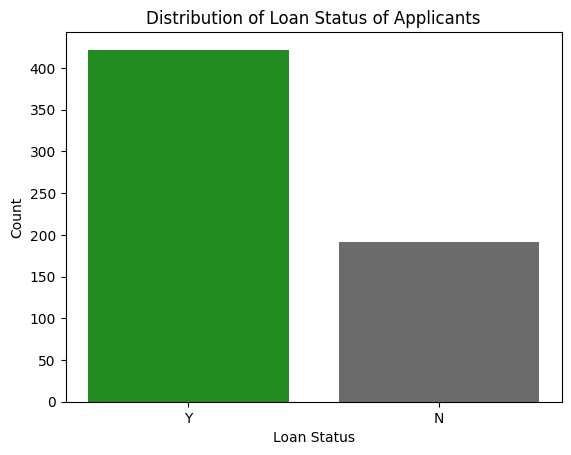

In [ ]:
# Bar Chart
loan_status = granjithkumar_loan_aproval['Loan_Status'].value_counts()
plt.bar(loan_status.index, loan_status.values, color=['#228B22', '#6B6B6B'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status of Applicants')
plt.show()


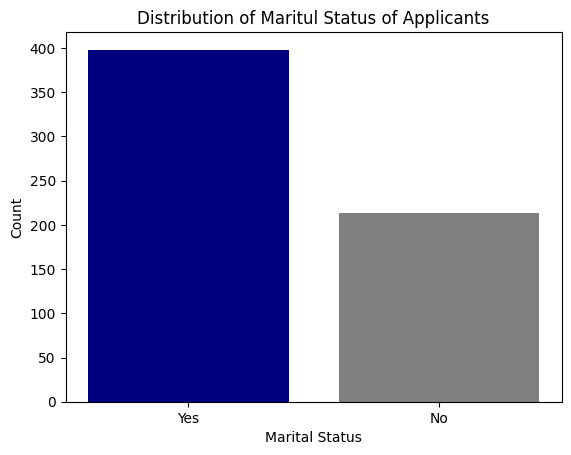

In [ ]:
# Bar Chart

married_applicants = granjithkumar_loan_aproval['Married'].value_counts()
plt.bar(married_applicants.index, married_applicants.values, color=['#000080', '#808080'])
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Maritul Status of Applicants')
plt.show()

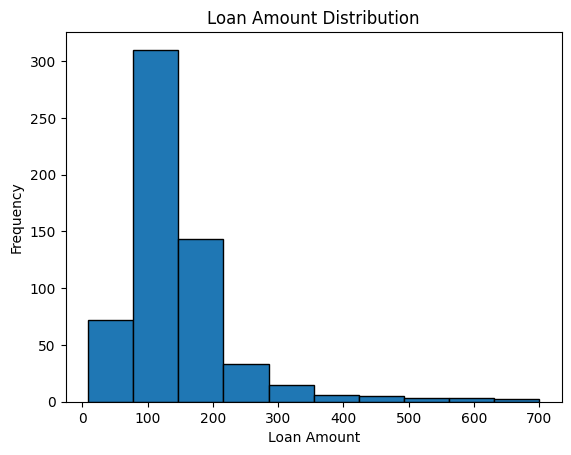

In [ ]:
# Histogram
# Extract loan Amount Column
column_data = granjithkumar_loan_aproval['LoanAmount']

# Create the histogram
plt.hist(column_data, bins=10, edgecolor='black')

# Set labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution')

# Display the plot
plt.show()

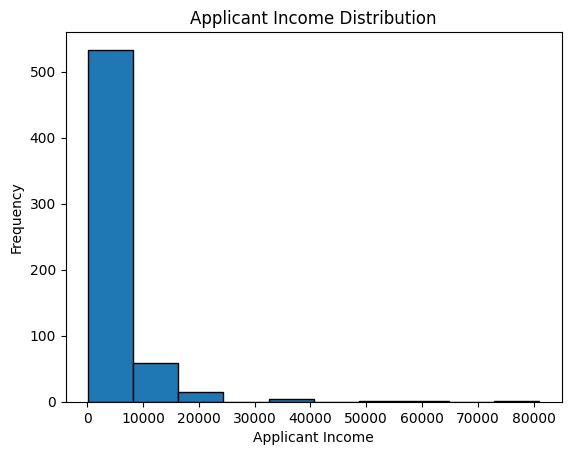

In [ ]:
# Histogram
# Extract loan Amount Column
column_data = granjithkumar_loan_aproval['ApplicantIncome']

# Create the histogram
plt.hist(column_data, bins=10, edgecolor='black')

# Set labels and title
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Applicant Income Distribution')

# Display the plot
plt.show()

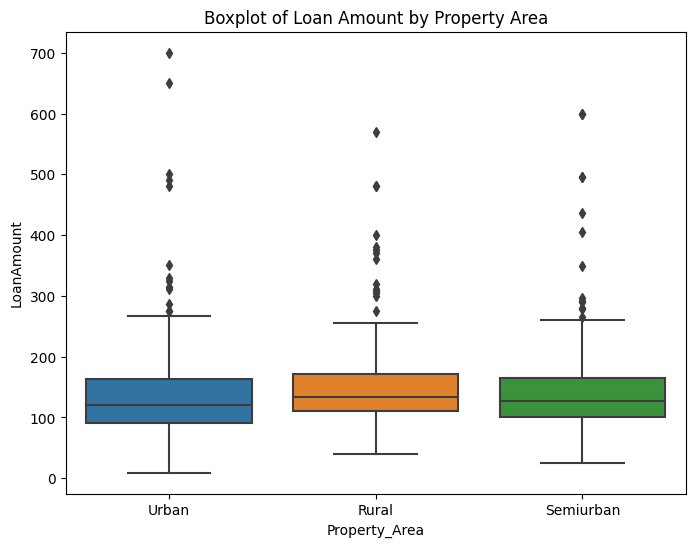

In [ ]:
# Box plot
import seaborn as sns

# Specify the numerical and categorical columns
numerical_column = 'LoanAmount'
categorical_column = 'Property_Area'

# Create the boxplot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=categorical_column, y=numerical_column, data=granjithkumar_loan_aproval)

# Set labels and title
plt.xlabel(categorical_column)
plt.ylabel(numerical_column)
plt.title('Boxplot of Loan Amount by Property Area')

# Display the plot
plt.show()


<ipython-input-34-9fd362d0a22e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = granjithkumar_loan_aproval.corr()


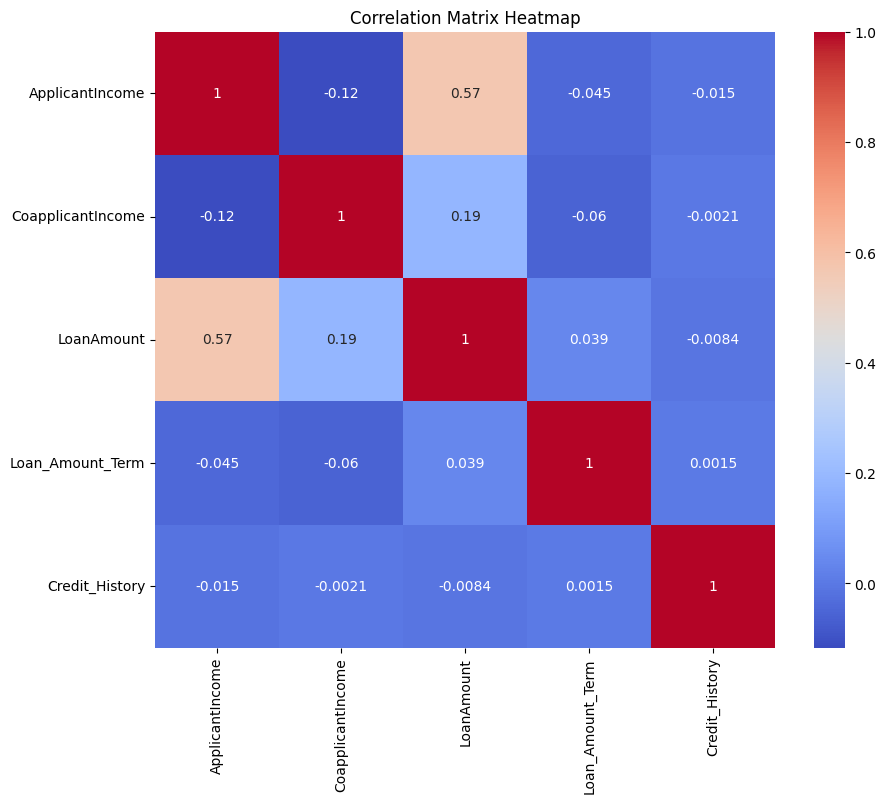

In [ ]:
# Heatmap
# Create the correlation matrix
correlation_matrix = granjithkumar_loan_aproval.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set title
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()

